In [1]:
import pandas as pd
import json 
import openpyxl
from sklearn.datasets import load_iris, load_boston
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

In [2]:
df_laliga_2017y18 = pd.read_csv('espana-master/2010s/2017-18/es.1.csv')
new = df_laliga_2017y18['FT'].str.split('-',n=1,expand=True)
df_laliga_2017y18['GolesLocal']=new[0]
df_laliga_2017y18['GolesVisitante']=new[1]
df_laliga_2017y18

,Round,Date,Team 1,FT,Team 2,GolesLocal,GolesVisitante
0,1,Fri Aug 18 2017,CD Leganés,1-0,Deportivo Alavés,1,0
1,1,Fri Aug 18 2017,Valencia CF,1-0,UD Las Palmas,1,0
2,1,Sat Aug 19 2017,RC Celta Vigo,2-3,Real Sociedad,2,3
3,1,Sat Aug 19 2017,Girona FC,2-2,Atlético Madrid,2,2
4,1,Sat Aug 19 2017,Sevilla FC,1-1,RCD Espanyol,1,1
...,...,...,...,...,...,...,...
375,38,Sat May 19 2018,Villarreal CF,2-2,Real Madrid,2,2
376,38,Sun May 20 2018,Valencia CF,2-1,RCD La Coruña,2,1
377,38,Sun May 20 2018,Athletic Club Bilbao,0-1,RCD Espanyol,0,1
378,38,Sun May 20 2018,Atlético Madrid,2-2,SD Eibar,2,2


In [3]:
df_laliga_2017y18['GolesLocal']=pd.to_numeric(df_laliga_2017y18['GolesLocal'], downcast="float")
df_laliga_2017y18['GolesVisitante']=pd.to_numeric(df_laliga_2017y18['GolesVisitante'], downcast="float")
df_laliga_2017y18['TotalGolesPartido'] = df_laliga_2017y18['GolesLocal']+df_laliga_2017y18['GolesVisitante']
df_laliga_2017y18

,Round,Date,Team 1,FT,Team 2,GolesLocal,GolesVisitante,TotalGolesPartido
0,1,Fri Aug 18 2017,CD Leganés,1-0,Deportivo Alavés,1.0,0.0,1.0
1,1,Fri Aug 18 2017,Valencia CF,1-0,UD Las Palmas,1.0,0.0,1.0
2,1,Sat Aug 19 2017,RC Celta Vigo,2-3,Real Sociedad,2.0,3.0,5.0
3,1,Sat Aug 19 2017,Girona FC,2-2,Atlético Madrid,2.0,2.0,4.0
4,1,Sat Aug 19 2017,Sevilla FC,1-1,RCD Espanyol,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...
375,38,Sat May 19 2018,Villarreal CF,2-2,Real Madrid,2.0,2.0,4.0
376,38,Sun May 20 2018,Valencia CF,2-1,RCD La Coruña,2.0,1.0,3.0
377,38,Sun May 20 2018,Athletic Club Bilbao,0-1,RCD Espanyol,0.0,1.0,1.0
378,38,Sun May 20 2018,Atlético Madrid,2-2,SD Eibar,2.0,2.0,4.0


In [4]:
df_laliga_2017y18['TotalGolesPartido'].sum()

1024.0

In [5]:
RealMadridL_6 = df_laliga_2017y18.loc[df_laliga_2017y18['Team 1'] == 'Real Madrid', ['GolesLocal']]
RealMadridL_6.reset_index(inplace=True)

RealMadridL_6

,index,GolesLocal
0,19,2.0
1,21,1.0
2,46,0.0
3,69,2.0
4,87,3.0
5,109,3.0
6,122,3.0
7,142,5.0
8,166,0.0
9,181,0.0


In [6]:
RealMadridV_6 = df_laliga_2017y18.loc[df_laliga_2017y18['Team 2'] == 'Real Madrid', ['GolesVisitante']]
RealMadridV_6.reset_index(inplace=True)

RealMadridV_6

,index,GolesVisitante
0,7,3.0
1,38,3.0
2,51,2.0
3,72,2.0
4,95,1.0
5,114,0.0
6,134,0.0
7,177,2.0
8,201,4.0
9,213,2.0


In [7]:
Madrid_Tot_6=pd.merge(RealMadridL_6, RealMadridV_6, left_index=True, right_index=True)
Madrid_Tot_6

,index_x,GolesLocal,index_y,GolesVisitante
0,19,2.0,7,3.0
1,21,1.0,38,3.0
2,46,0.0,51,2.0
3,69,2.0,72,2.0
4,87,3.0,95,1.0
5,109,3.0,114,0.0
6,122,3.0,134,0.0
7,142,5.0,177,2.0
8,166,0.0,201,4.0
9,181,0.0,213,2.0


In [8]:
Madrid_Tot_6['GolesTotales']=Madrid_Tot_6['GolesLocal']+Madrid_Tot_6['GolesVisitante']
Madrid_Tot_6

,index_x,GolesLocal,index_y,GolesVisitante,GolesTotales
0,19,2.0,7,3.0,5.0
1,21,1.0,38,3.0,4.0
2,46,0.0,51,2.0,2.0
3,69,2.0,72,2.0,4.0
4,87,3.0,95,1.0,4.0
5,109,3.0,114,0.0,3.0
6,122,3.0,134,0.0,3.0
7,142,5.0,177,2.0,7.0
8,166,0.0,201,4.0,4.0
9,181,0.0,213,2.0,2.0


In [9]:
Madrid_Tot_6['GolesLocal'].describe()

count    19.000000
mean      2.842105
std       2.167004
min       0.000000
25%       1.000000
50%       3.000000
75%       4.500000
max       7.000000
Name: GolesLocal, dtype: float64

In [10]:
Madrid_Tot_6['GolesLocal'].sum()

54.0

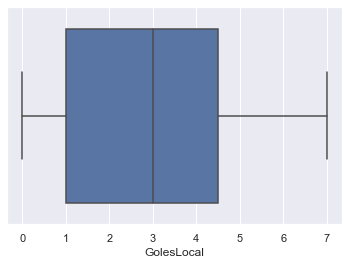

In [11]:
sns.boxplot(x=Madrid_Tot_6['GolesLocal'])
plt.show()

In [12]:
Madrid_Tot_6['GolesVisitante'].describe()

count    19.000000
mean      2.105263
std       1.286457
min       0.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       5.000000
Name: GolesVisitante, dtype: float64

In [13]:
Madrid_Tot_6['GolesVisitante'].sum()

40.0

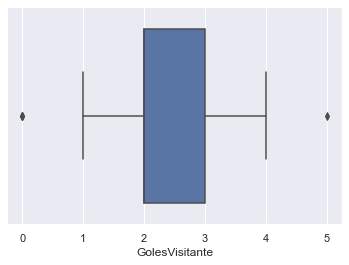

In [14]:
sns.boxplot(x=Madrid_Tot_6['GolesVisitante'])
plt.show()

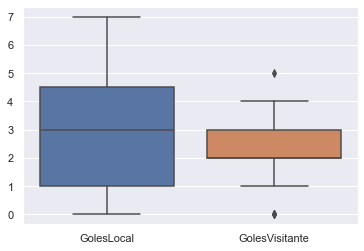

In [15]:
sns.boxplot(data=Madrid_Tot_6.loc[:, ['GolesLocal', 'GolesVisitante']])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


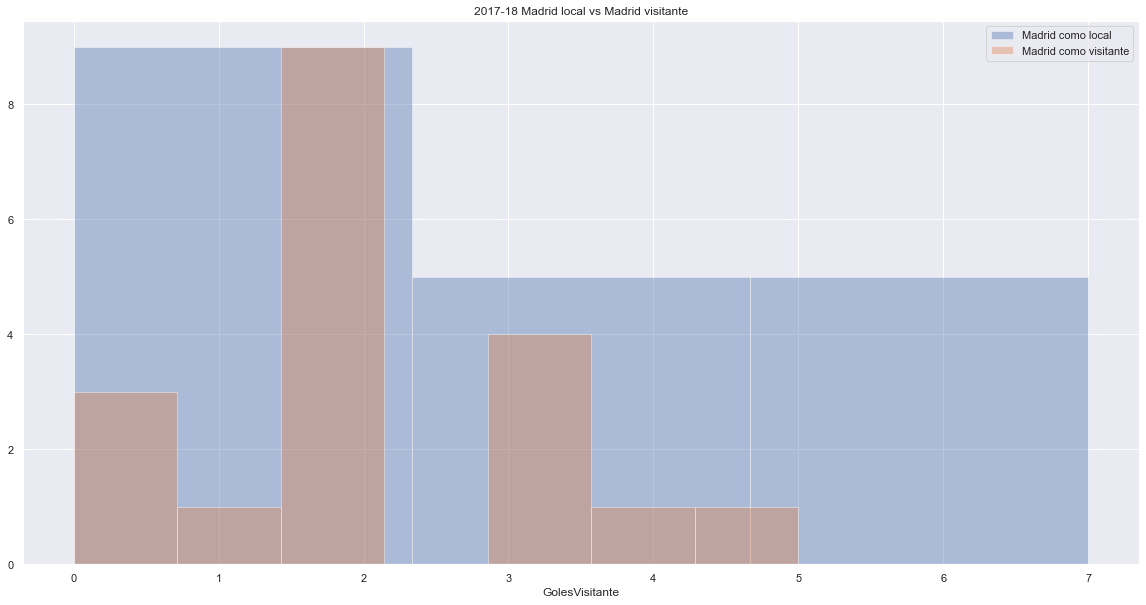

In [16]:
plt.figure(figsize = (20,10))
sns.distplot(Madrid_Tot_6['GolesLocal'],kde=False, label='Madrid como local')
sns.distplot(Madrid_Tot_6['GolesVisitante'],kde=False, label='Madrid como visitante')
plt.title("2017-18 Madrid local vs Madrid visitante")
plt.legend()

Text(0.5, 1.0, '2017-18 Madrid local vs Madrid visitante')

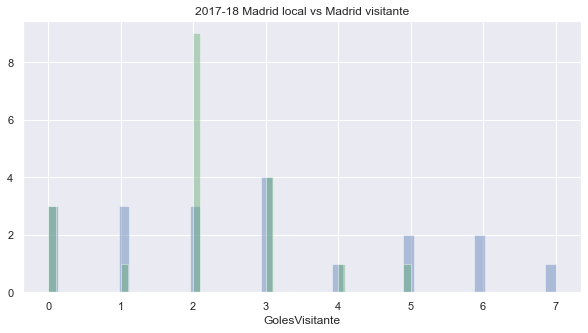

In [18]:
plt.figure(figsize=(10,5))
sns.distplot(Madrid_Tot_6['GolesLocal'],
             kde=False,
             color='b',
             bins=50);
sns.distplot(Madrid_Tot_6['GolesVisitante'],
             kde=False,
             color='g',
             bins=50);
plt.title("2017-18 Madrid local vs Madrid visitante")

In [19]:
BarsaL_6 = df_laliga_2017y18.loc[df_laliga_2017y18['Team 1'] == 'FC Barcelona', ['GolesLocal']]
BarsaL_6.reset_index(inplace=True)
BarsaL_6

,index,GolesLocal
0,6,2.0
1,24,5.0
2,41,6.0
3,66,3.0
4,83,2.0
5,104,2.0
6,131,2.0
7,157,4.0
8,174,3.0
9,207,2.0


In [20]:
BarsaV_6 = df_laliga_2017y18.loc[df_laliga_2017y18['Team 2'] == 'FC Barcelona', ['GolesVisitante']]
BarsaV_6.reset_index(inplace=True)
BarsaV_6

,index,GolesVisitante
0,12,2.0
1,32,2.0
2,53,3.0
3,74,1.0
4,92,2.0
5,112,3.0
6,128,1.0
7,148,2.0
8,166,3.0
9,187,4.0


In [35]:
BarsaTot_6=pd.merge(BarsaL_6, BarsaV_6, left_index=True, right_index=True)
BarsaTot_6['GolesTotales']=BarsaTot_6['GolesLocal']+BarsaTot_6['GolesVisitante']
BarsaTot_6

,index_x,GolesLocal,index_y,GolesVisitante,GolesTotales
0,6,2.0,12,2.0,4.0
1,24,5.0,32,2.0,7.0
2,41,6.0,53,3.0,9.0
3,66,3.0,74,1.0,4.0
4,83,2.0,92,2.0,4.0
5,104,2.0,112,3.0,5.0
6,131,2.0,128,1.0,3.0
7,157,4.0,148,2.0,6.0
8,174,3.0,166,3.0,6.0
9,207,2.0,187,4.0,6.0


In [22]:
BarsaTot_6['GolesLocal'].sum()

53.0

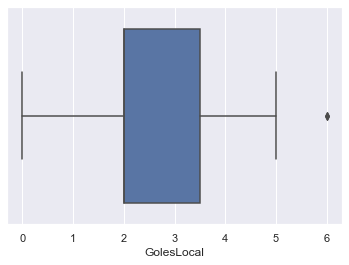

In [23]:
sns.boxplot(x=BarsaTot_6['GolesLocal'])
plt.show()

In [24]:
BarsaTot_6['GolesVisitante'].sum()

46.0

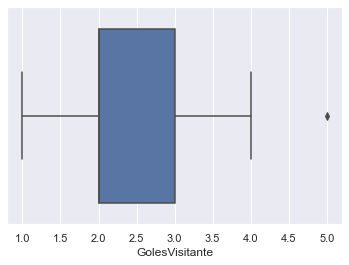

In [25]:
sns.boxplot(x=BarsaTot_6['GolesVisitante'])
plt.show()

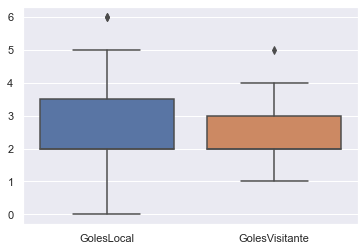

In [26]:
sns.boxplot(data=BarsaTot_6.loc[:, ['GolesLocal', 'GolesVisitante']])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


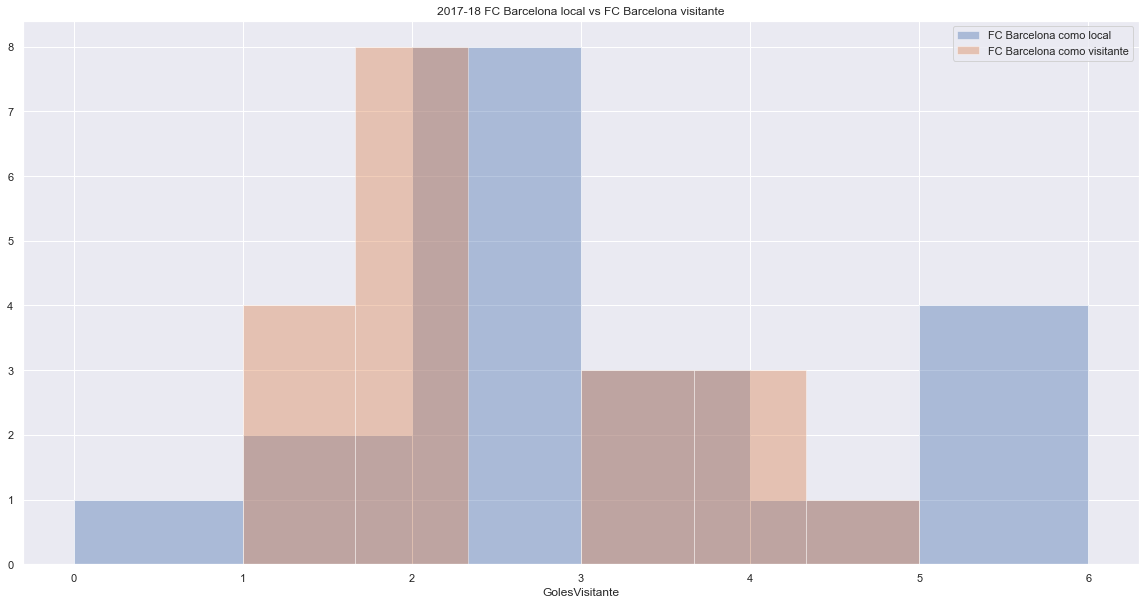

In [27]:
plt.figure(figsize = (20,10))
sns.distplot(BarsaTot_6['GolesLocal'],kde=False, label='FC Barcelona como local')
sns.distplot(BarsaTot_6['GolesVisitante'],kde=False, label='FC Barcelona como visitante')
plt.title("2017-18 FC Barcelona local vs FC Barcelona visitante")
plt.legend()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '2017-18 FC Barcelona local vs FC Barcelona visitante')

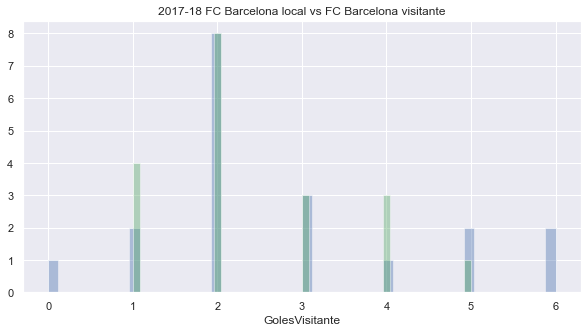

In [28]:
plt.figure(figsize=(10,5))
sns.distplot(BarsaTot_6['GolesLocal'],
             kde=False,
             color='b',
             bins=50);
sns.distplot(BarsaTot_6['GolesVisitante'],
             kde=False,
             color='g',
             bins=50);
plt.title("2017-18 FC Barcelona local vs FC Barcelona visitante")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


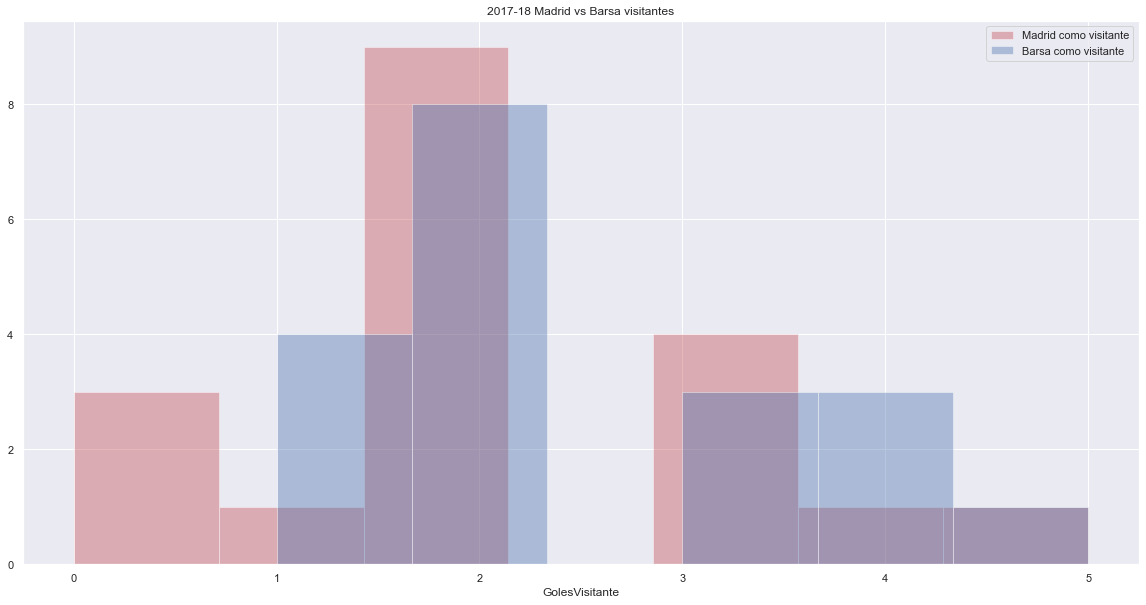

In [29]:
plt.figure(figsize = (20,10))
sns.distplot(Madrid_Tot_6['GolesVisitante'],kde=False,color='r', label='Madrid como visitante')
sns.distplot(BarsaTot_6['GolesVisitante'],kde=False,color='b', label='Barsa como visitante')
plt.title("2017-18 Madrid vs Barsa visitantes")
plt.legend()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


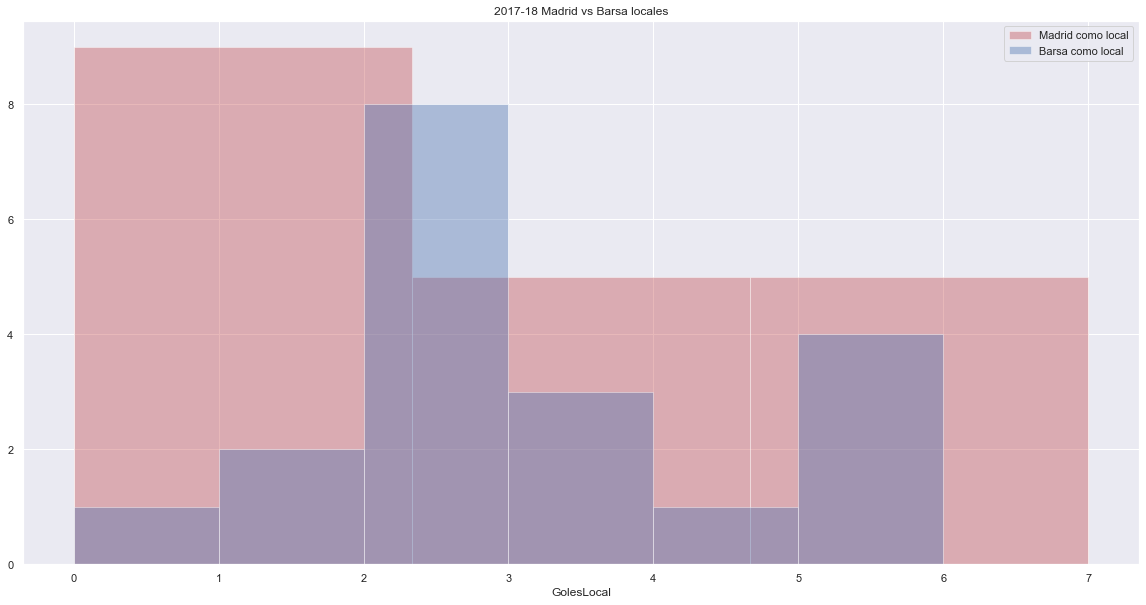

In [30]:
plt.figure(figsize = (20,10))
sns.distplot(Madrid_Tot_6['GolesLocal'],kde=False,color='r', label='Madrid como local')
sns.distplot(BarsaTot_6['GolesLocal'],kde=False,color='b', label='Barsa como local')
plt.title("2017-18 Madrid vs Barsa locales")
plt.legend()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '2017-18 Partidos x número de goles')

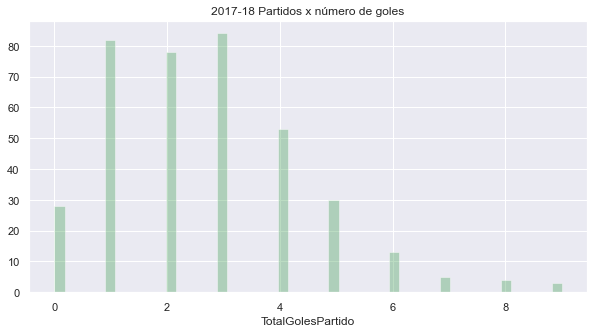

In [31]:
plt.figure(figsize=(10,5))
sns.distplot(df_laliga_2017y18['TotalGolesPartido'],
             kde=False,
             color='g',
             bins=50);
plt.title("2017-18 Partidos x número de goles")

Text(0.5, 1.0, '2017-18 Equipos de LaLiga goles como Locales')

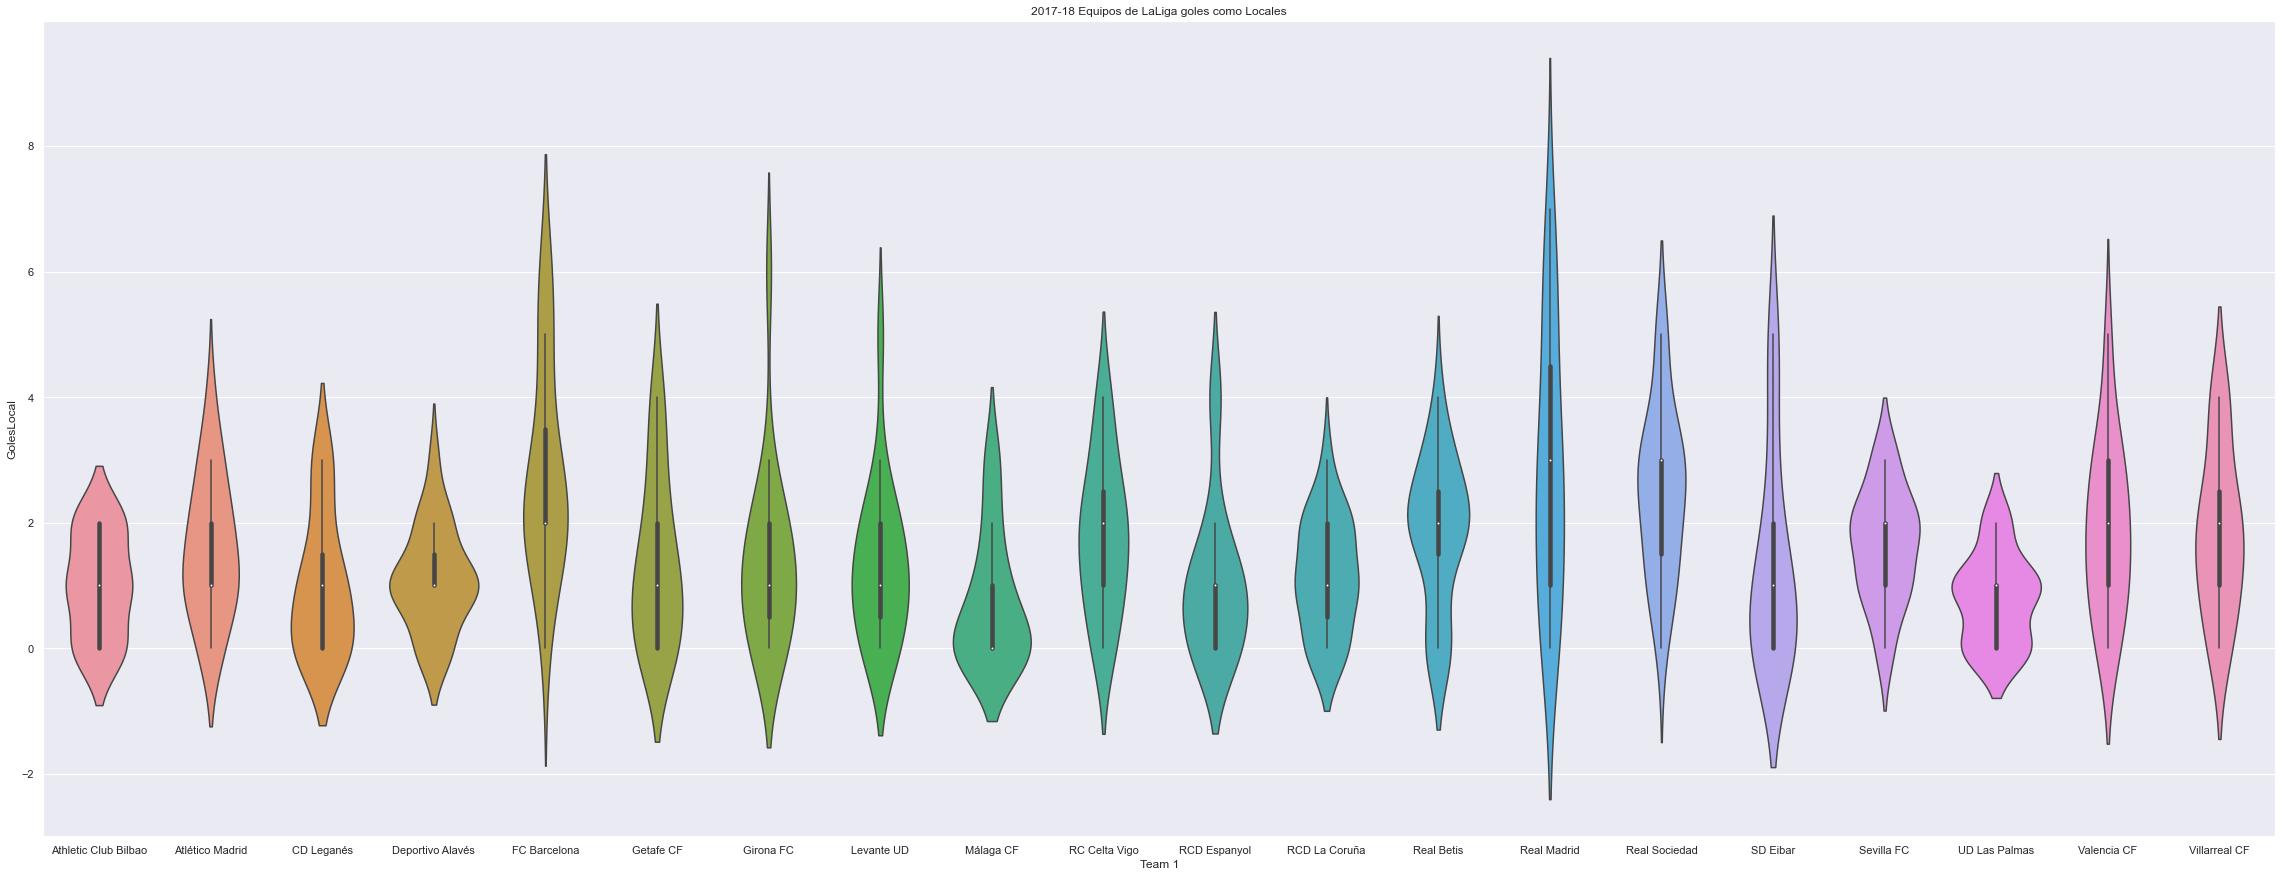

In [32]:
plt.figure(figsize=(40,15))
sns.violinplot(x=df_laliga_2017y18['Team 1'].sort_values(), y=df_laliga_2017y18['GolesLocal'])
plt.title("2017-18 Equipos de LaLiga goles como Locales")

Text(0.5, 1.0, '2017-18 Equipos de LaLiga goles como Visitantes')

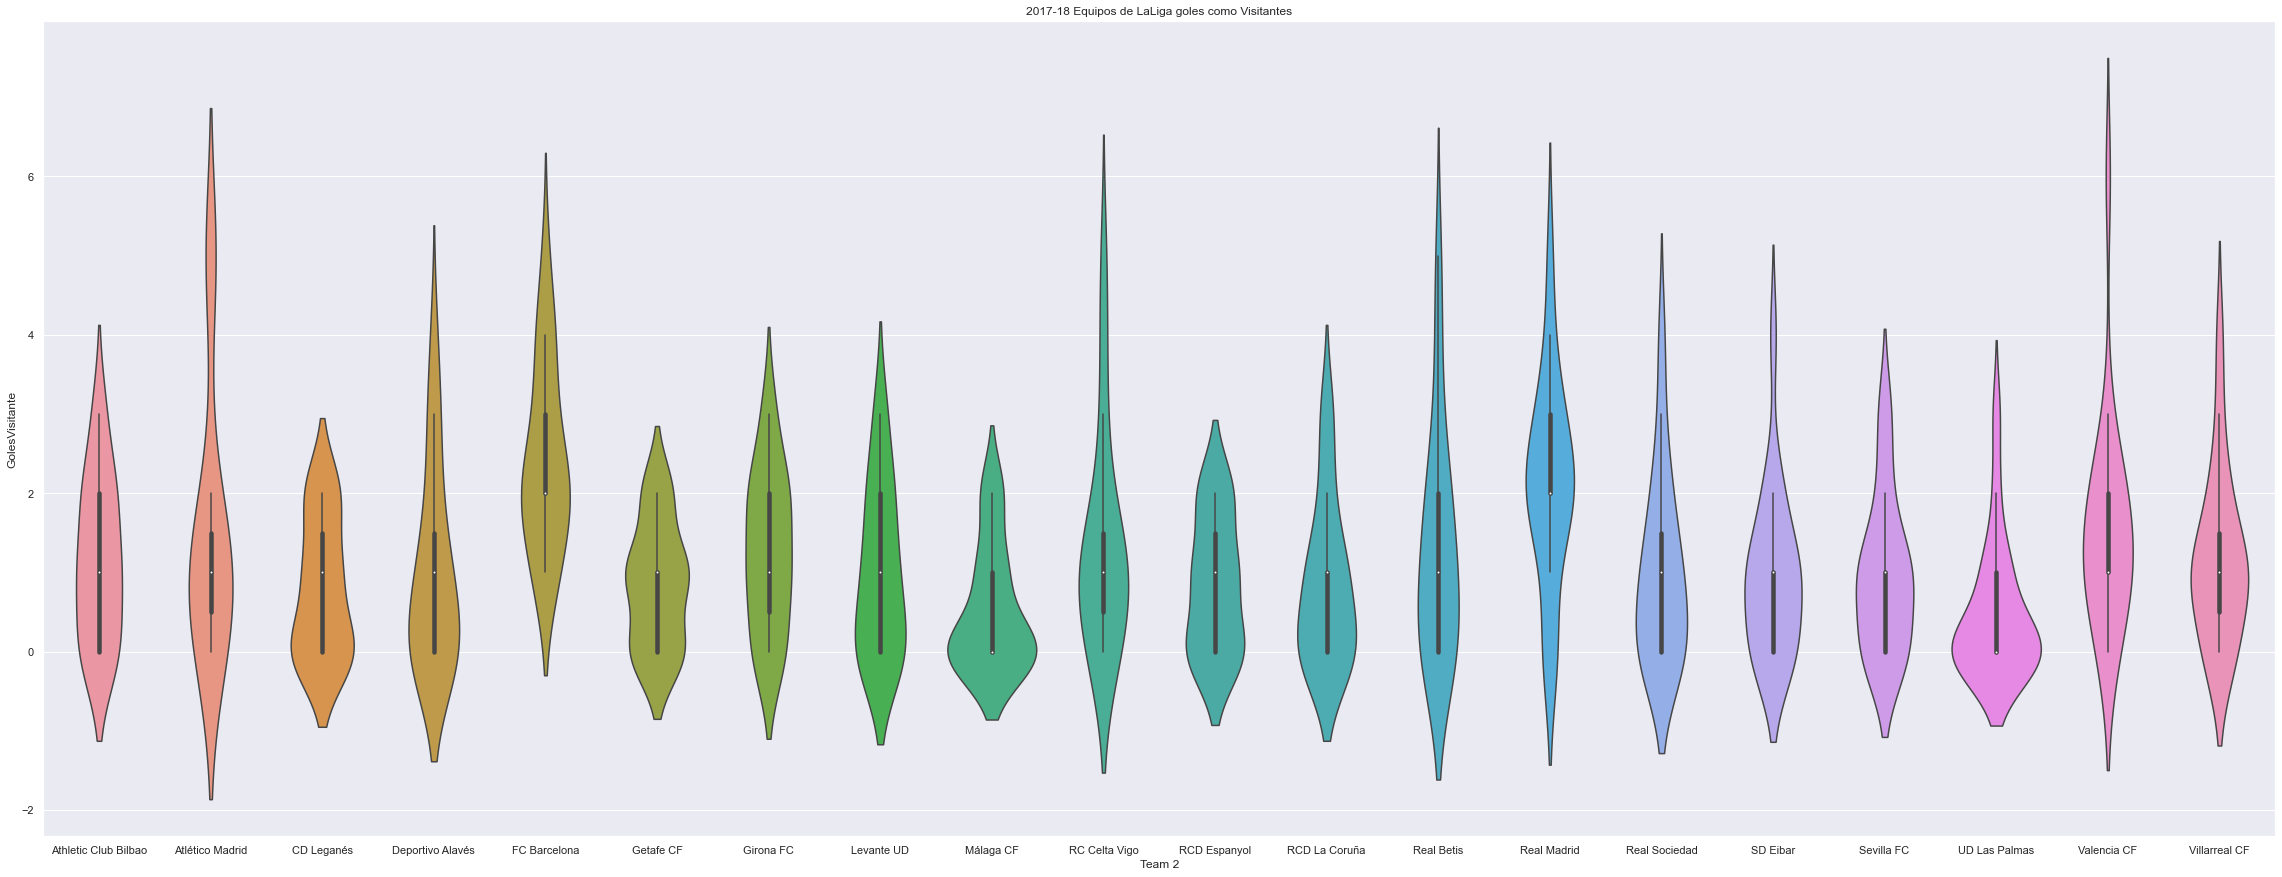

In [33]:
plt.figure(figsize=(40,15))
sns.violinplot(x=df_laliga_2017y18['Team 2'].sort_values(), y=df_laliga_2017y18['GolesVisitante'])
plt.title("2017-18 Equipos de LaLiga goles como Visitantes")

Ganador FC Barcelona

In [34]:
Madrid_Tot_6['GolesTotales'].sum()

94.0

In [36]:
BarsaTot_6['GolesTotales'].sum()

99.0